# bloods.ai Blood Spectroscopy Classification Challenge

[Zindi Website](https://zindi.africa/competitions/bloodsai-blood-spectroscopy-classification-challenge)

In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Settings for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Settings for seaborn
sns.set(rc = {'figure.figsize':(20,8)})

In [3]:
import warnings  # To ignore warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

## Quick look at the Data

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,absorbance40,absorbance41,absorbance42,absorbance43,absorbance44,absorbance45,absorbance46,absorbance47,absorbance48,absorbance49,absorbance50,absorbance51,absorbance52,absorbance53,absorbance54,absorbance55,absorbance56,absorbance57,absorbance58,absorbance59,absorbance60,absorbance61,absorbance62,absorbance63,absorbance64,absorbance65,absorbance66,absorbance67,absorbance68,absorbance69,absorbance70,absorbance71,absorbance72,absorbance73,absorbance74,absorbance75,absorbance76,absorbance77,absorbance78,absorbance79,absorbance80,absorbance81,absorbance82,absorbance83,absorbance84,absorbance85,absorbance86,absorbance87,absorbance88,absorbance89,absorbance90,absorbance91,absorbance92,absorbance93,absorbance94,absorbance95,absorbance96,absorbance97,absorbance98,absorbance99,absorbance100,absorbance101,absorbance102,absorbance103,absorbance104,absorbance105,absorbance106,absorbance107,absorbance108,absorbance109,absorbance110,absorbance111,absorbance112,absorbance113,absorbance114,absorbance115,absorbance116,absorbance117,absorbance118,absorbance119,absorbance120,absorbance121,absorbance122,absorbance123,absorbance124,absorbance125,absorbance126,absorbance127,absorbance128,absorbance129,absorbance130,absorbance131,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,0.554599,0.561290,0.566327,0.572561,0.584058,0.600599,0.623070,0.658285,0.686114,0.709545,0.724821,0.734988,0.741781,0.747436,0.751436,0.754422,0.756453,0.757551,0.755906,0.755312,0.753683,0.749485,0.747089,0.742365,0.737801,0.731800,0.728901,0.726665,0.724987,0.723236,0.722218,0.721959,0.723420,0.725568,0.727912,0.732808,0.738841,0.744196,0.750936,0.760459,0.771155,0.786990,0.802567,0.820151,0.840385,0.862428,0.883987,0.915022,0.938121,0.962134,0.985110,1.005376,1.028167,1.057673,1.091236,1.131555,1.183293,1.250629,1.347067,1.434103,1.513908,1.580763,1.633662,1.682037,1.713957,1.726614,1.748343,1.747945,1.758569,1.766921,1.769584,1.779920,1.775320,1.778008,1.771992,1.769344,1.760372,1.758964,1.740655,1.725768,1.731394,1.708660,1.688087,1.675167,1.672070,1.654336,1.638999,1.625188,1.606235,1.589153,1.572245,1.562602,1.532526,1.521140,1.506031,1.489166,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.49794

In [5]:
train.shape

(13140, 176)

In [6]:
test.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,absorbance40,absorbance41,absorbance42,absorbance43,absorbance44,absorbance45,absorbance46,absorbance47,absorbance48,absorbance49,absorbance50,absorbance51,absorbance52,absorbance53,absorbance54,absorbance55,absorbance56,absorbance57,absorbance58,absorbance59,absorbance60,absorbance61,absorbance62,absorbance63,absorbance64,absorbance65,absorbance66,absorbance67,absorbance68,absorbance69,absorbance70,absorbance71,absorbance72,absorbance73,absorbance74,absorbance75,absorbance76,absorbance77,absorbance78,absorbance79,absorbance80,absorbance81,absorbance82,absorbance83,absorbance84,absorbance85,absorbance86,absorbance87,absorbance88,absorbance89,absorbance90,absorbance91,absorbance92,absorbance93,absorbance94,absorbance95,absorbance96,absorbance97,absorbance98,absorbance99,absorbance100,absorbance101,absorbance102,absorbance103,absorbance104,absorbance105,absorbance106,absorbance107,absorbance108,absorbance109,absorbance110,absorbance111,absorbance112,absorbance113,absorbance114,absorbance115,absorbance116,absorbance117,absorbance118,absorbance119,absorbance120,absorbance121,absorbance122,absorbance123,absorbance124,absorbance125,absorbance126,absorbance127,absorbance128,absorbance129,absorbance130,absorbance131,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_37BEI22R,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,0.512690,0.528313,0.540020,0.550252,0.555062,0.555983,0.562491,0.559443,0.562695,0.558805,0.559067,0.557602,0.554924,0.553300,0.549671,0.548033,0.544539,0.542640,0.541228,0.540335,0.539378,0.539134,0.538375,0.538068,0.540340,0.541754,0.543920,0.547749,0.550490,0.553550,0.559024,0.562538,0.568940,0.574474,0.588116,0.604365,0.634176,0.663675,0.691110,0.709235,0.724206,0.733142,0.741955,0.746420,0.752771,0.755326,0.757253,0.759209,0.755054,0.752185,0.747900,0.744157,0.739882,0.736745,0.734939,0.733181,0.730990,0.728199,0.726459,0.726098,0.725836,0.727701,0.727729,0.731637,0.735136,0.739132,0.745735,0.751143,0.759484,0.767748,0.779456,0.792689,0.807246,0.829539,0.846949,0.868845,0.891984,0.911475,0.933077,0.960059,0.978181,0.997523,1.015762,1.034487,1.062435,1.105037,1.151678,1.200577,1.252884,1.310461,1.352299,1.385187,1.410133,1.425620,1.434786,1.447858,1.438987,1.442312,1.452077,1.455867,1.454878,1.456796,1.455786,1.456508,1.456662,1.459142,1.455464,1.453365,1.453548,1.457208,1.448304,1.447966,1.446511,1.445413,1.437354,1.431712,1.431223,1.429847,1.423059,1.417072,1.407601,1.401527,1.407248,1.393886,1.389147,1.385912,1.377751,1.372950,1.366470,1.360301,1.351162,1.346405,1.350380,1.340395,1.326046,1.324390,1.322257,1.314661,1.308962,1.308751,1.298821,1.285794,1.294162,1.286025,1.288414,1.287432,1.266873,1.272191,1.270802,1.263687,1.252631,1.248400,1.249067,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,ID_4W85V5DV,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,0.575223,0.588780,0.603260,0.609797,0.613326,0

In [7]:
test.shape

(3660, 173)

In [8]:
train.isnull().sum().sort_values()

Reading_ID               0
absorbance111            0
absorbance112            0
absorbance113            0
absorbance114            0
                        ..
absorbance60             0
absorbance61             0
absorbance62             0
hemoglobin(hgb)_human    0
cholesterol_ldl_human    0
Length: 176, dtype: int64

In [9]:
test.isnull().sum().sort_values()

Reading_ID       0
absorbance109    0
absorbance110    0
absorbance111    0
absorbance112    0
                ..
absorbance58     0
absorbance59     0
absorbance60     0
absorbance52     0
humidity         0
Length: 173, dtype: int64

There are no missing values.

### Dropping Reading_ID from the data

In [10]:
test_id = test["Reading_ID"]  # Need for submission

In [11]:
train.drop(["Reading_ID"], axis=1, inplace=True)
test.drop(["Reading_ID"], axis=1, inplace=True)

### Distribution of the response variables

<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='count'>

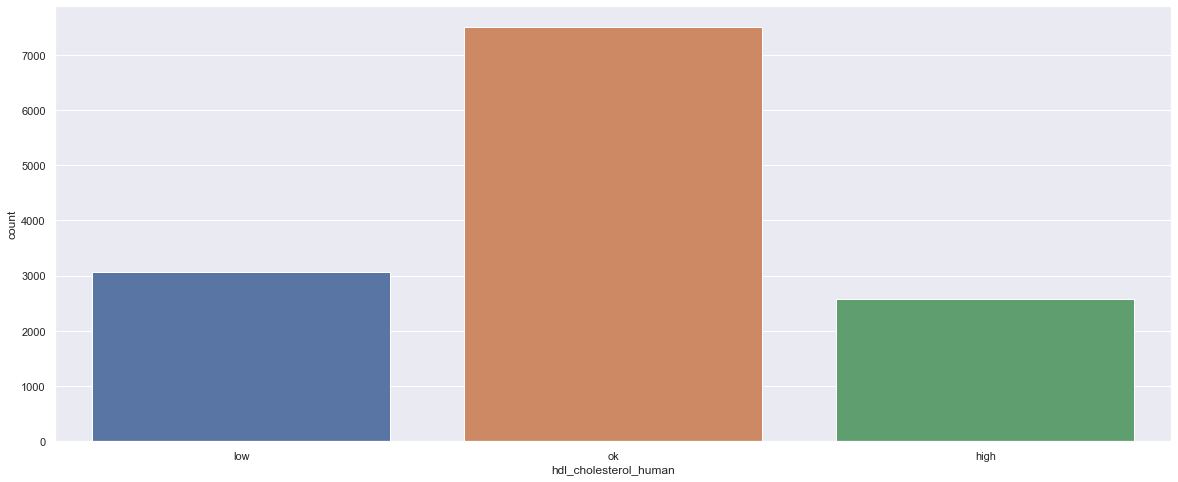

In [12]:
sns.countplot(train["hdl_cholesterol_human"], order=['low','ok','high'])

<AxesSubplot:xlabel='hemoglobin(hgb)_human', ylabel='count'>

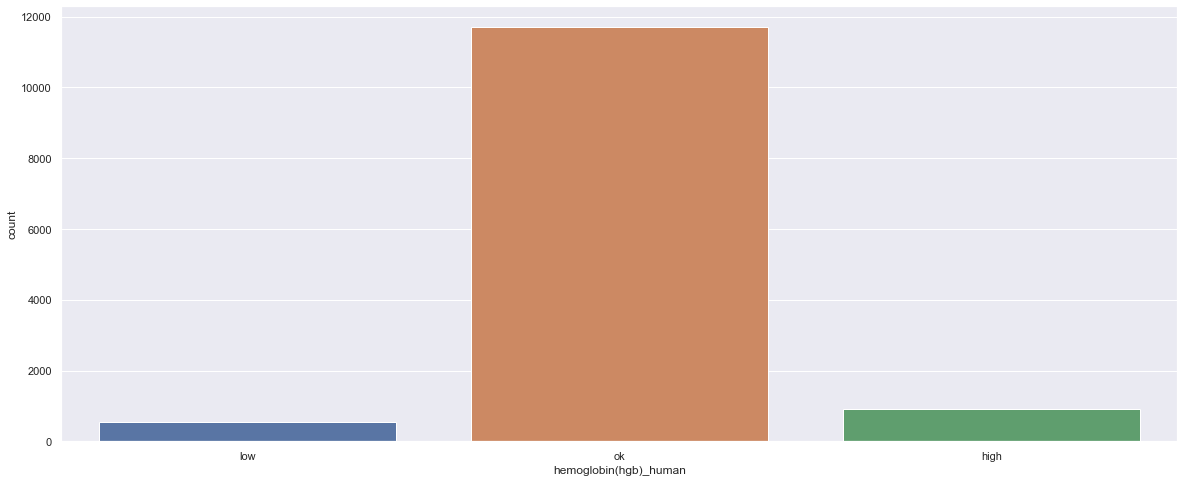

In [13]:
sns.countplot(train["hemoglobin(hgb)_human"], order=['low','ok','high'])

<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

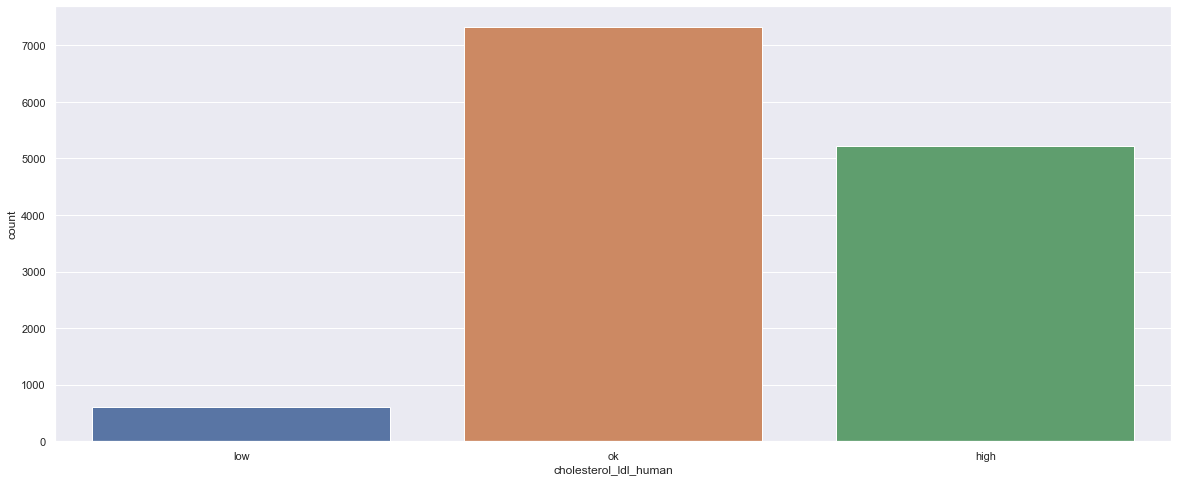

In [14]:
sns.countplot(train["cholesterol_ldl_human"], order=['low','ok','high'])

### Distributions of the exploratory variables

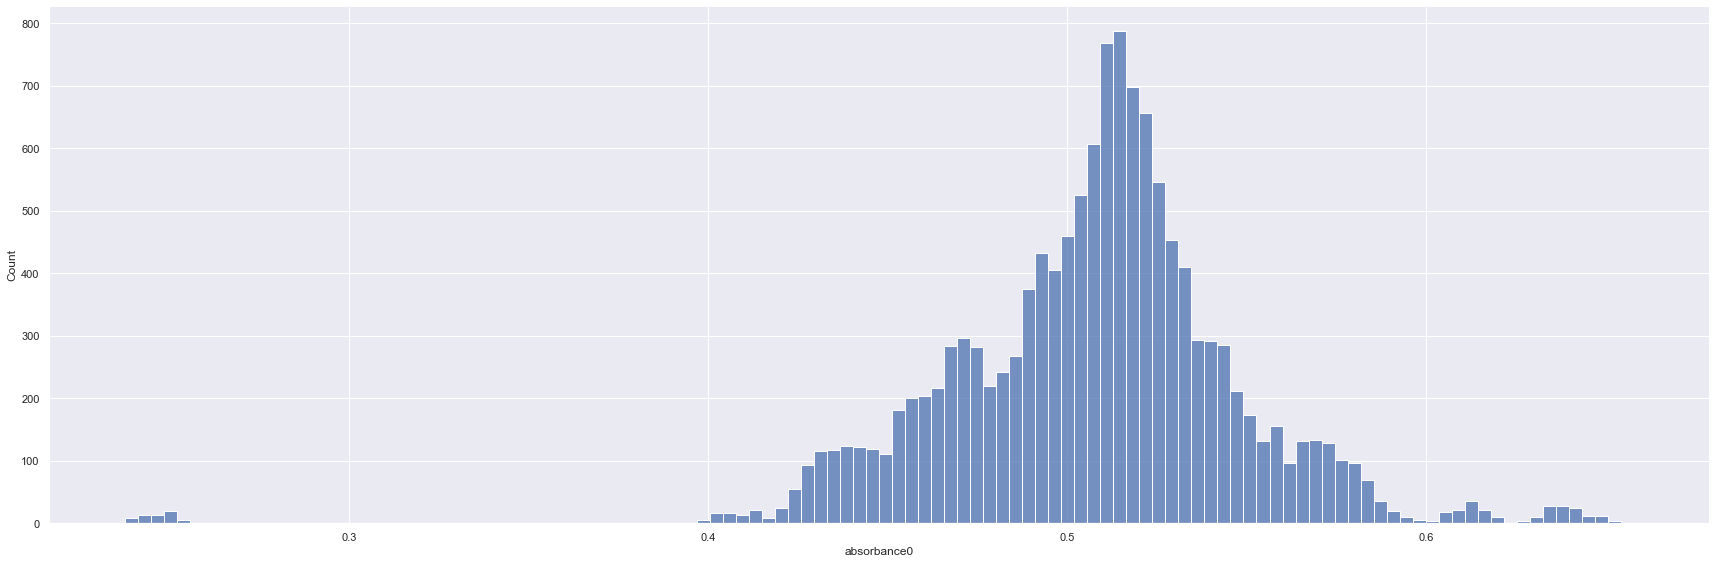

In [15]:
sns.displot(train, x="absorbance0", height=8, aspect=3)

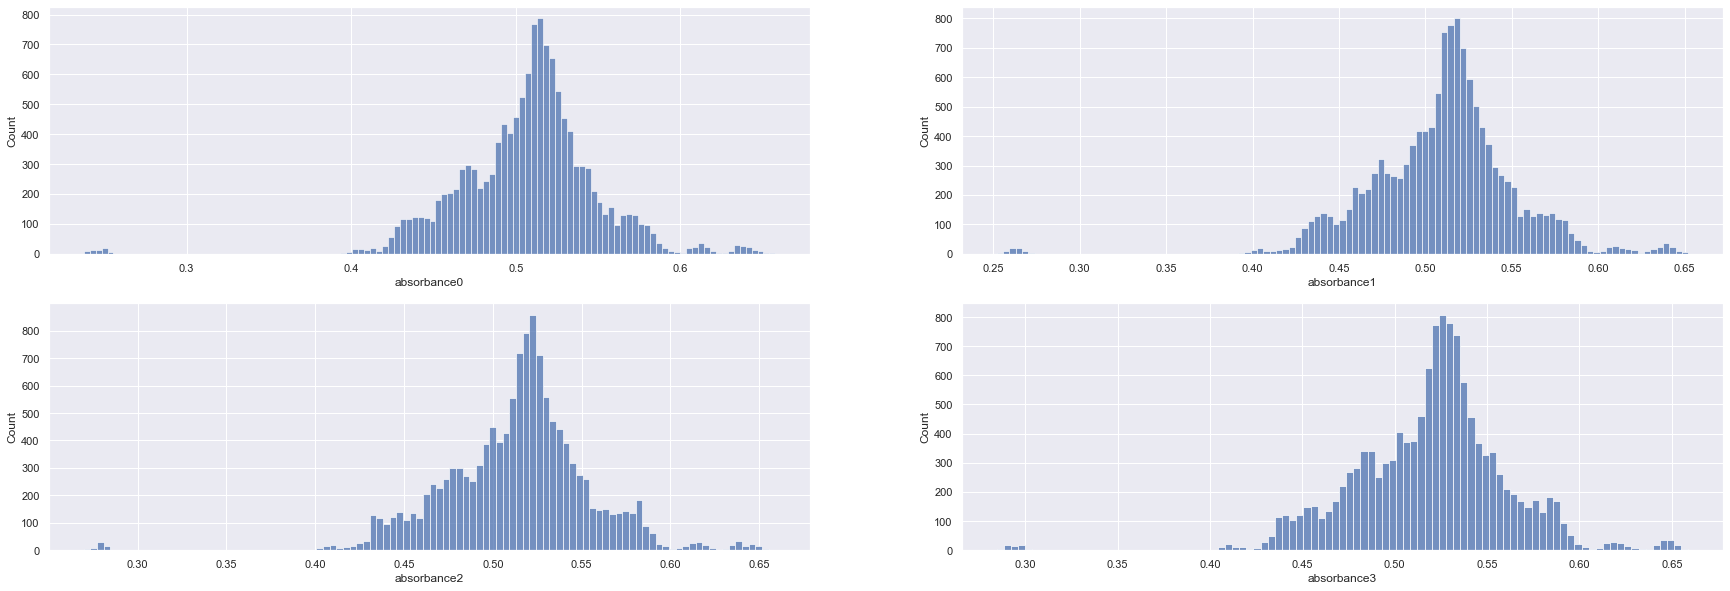

In [16]:
fig, ax = plt.subplots(2,2,figsize=(30,10))
sns.histplot(train, x="absorbance0", ax=ax[0,0])
sns.histplot(train, x="absorbance1", ax=ax[0,1])
sns.histplot(train, x="absorbance2", ax=ax[1,0])
sns.histplot(train, x="absorbance3", ax=ax[1,1])
fig.show()

In [17]:
train.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,absorbance40,absorbance41,absorbance42,absorbance43,absorbance44,absorbance45,absorbance46,absorbance47,absorbance48,absorbance49,absorbance50,absorbance51,absorbance52,absorbance53,absorbance54,absorbance55,absorbance56,absorbance57,absorbance58,absorbance59,absorbance60,absorbance61,absorbance62,absorbance63,absorbance64,absorbance65,absorbance66,absorbance67,absorbance68,absorbance69,absorbance70,absorbance71,absorbance72,absorbance73,absorbance74,absorbance75,absorbance76,absorbance77,absorbance78,absorbance79,absorbance80,absorbance81,absorbance82,absorbance83,absorbance84,absorbance85,absorbance86,absorbance87,absorbance88,absorbance89,absorbance90,absorbance91,absorbance92,absorbance93,absorbance94,absorbance95,absorbance96,absorbance97,absorbance98,absorbance99,absorbance100,absorbance101,absorbance102,absorbance103,absorbance104,absorbance105,absorbance106,absorbance107,absorbance108,absorbance109,absorbance110,absorbance111,absorbance112,absorbance113,absorbance114,absorbance115,absorbance116,absorbance117,absorbance118,absorbance119,absorbance120,absorbance121,absorbance122,absorbance123,absorbance124,absorbance125,absorbance126,absorbance127,absorbance128,absorbance129,absorbance130,absorbance131,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000

Simple statistics of the numerical variables

#### Correlation heat map

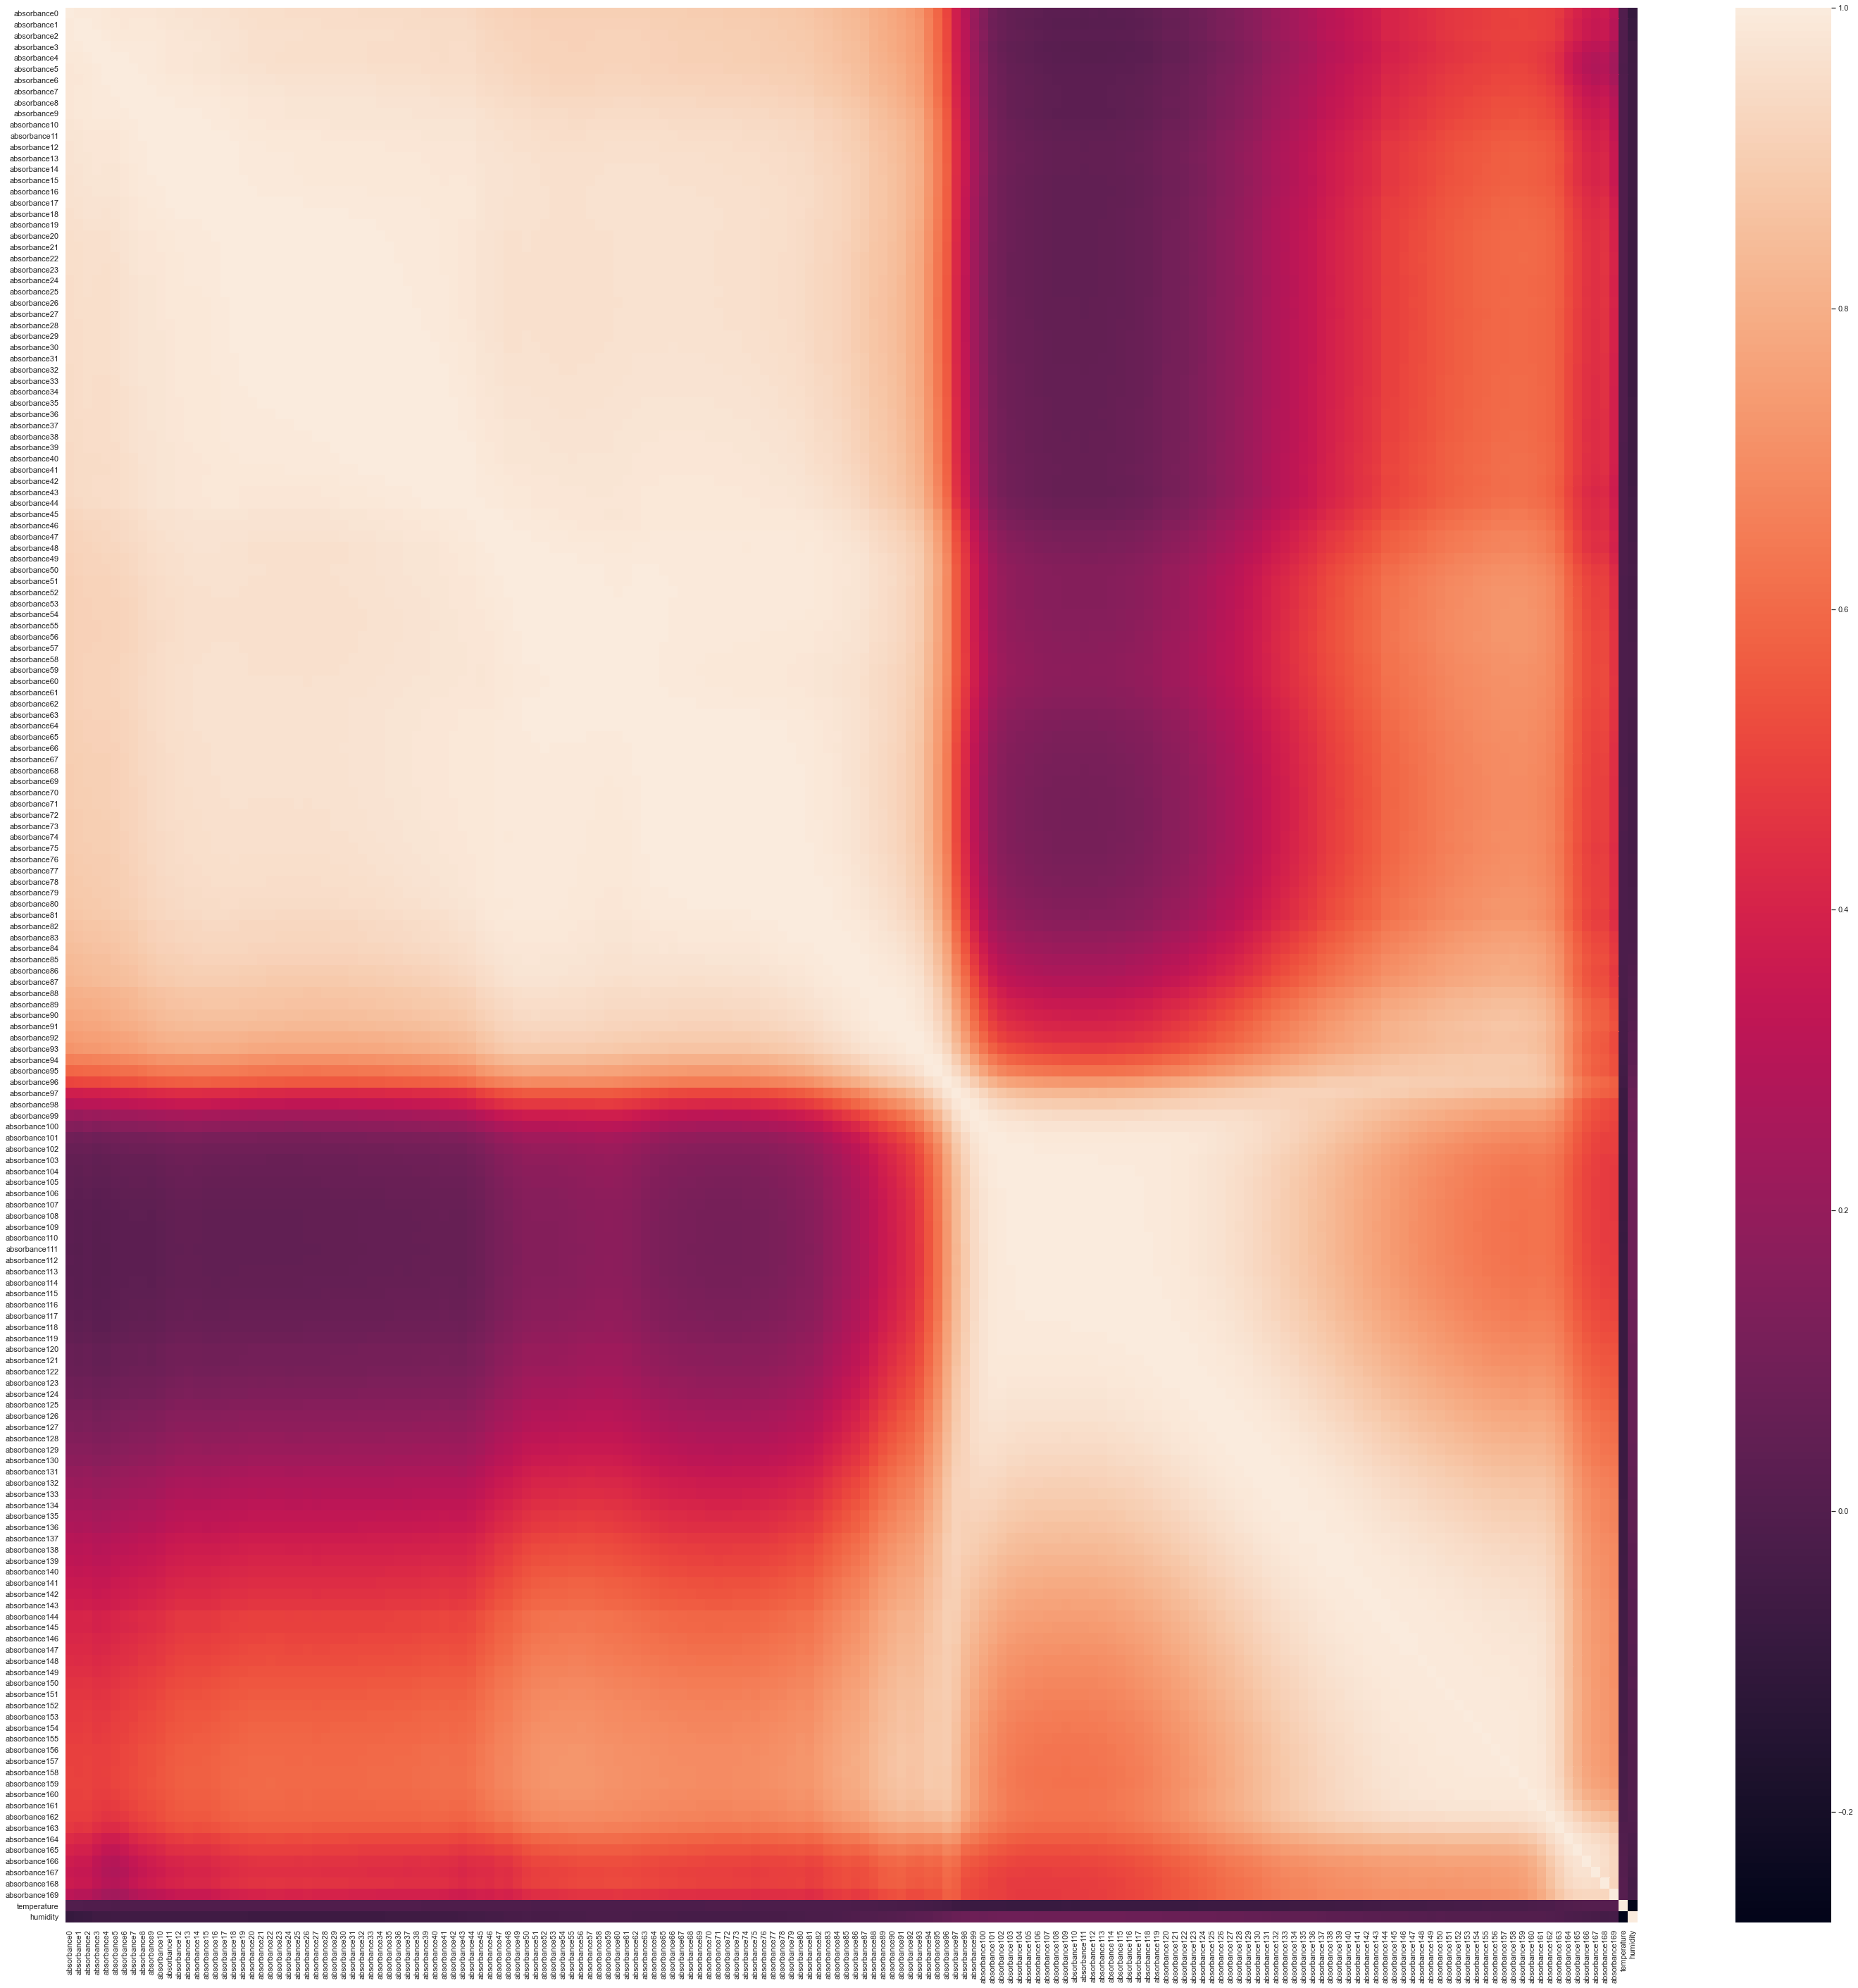

In [18]:
fig, ax = plt.subplots(1,1,figsize=(50,50))
corr = train.iloc[:,:-3].corr()
sns.heatmap(corr)
fig.show()

There seem to be some multicollinearity here, but since we are not using linear models to classify, this won't be a big issue I think?

### Transforming categorical response variables into numerical ones

In [19]:
train.iloc[:,[-3,-2,-1]]

,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ok,ok,ok
1,ok,high,high
2,ok,ok,high
3,low,ok,high
4,ok,ok,high
...,...,...,...
13135,high,ok,ok
13136,ok,ok,ok
13137,ok,ok,ok
13138,ok,ok,ok


Since it's low - ok - high, I think it's better to use a ordinal values like 1,2,3 instead of a dummy variable.

In [20]:
scale_mapper = {"low":1, "ok":2, "high":3}
train["hdl_cholesterol_human"] = train["hdl_cholesterol_human"].replace(scale_mapper)
train["hemoglobin(hgb)_human"] = train["hemoglobin(hgb)_human"].replace(scale_mapper)
train["cholesterol_ldl_human"] = train["cholesterol_ldl_human"].replace(scale_mapper)

In [21]:
train.iloc[:,[-3,-2,-1]]

,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,2,2,2
1,2,3,3
2,2,2,3
3,1,2,3
4,2,2,3
...,...,...,...
13135,3,2,2
13136,2,2,2
13137,2,2,2
13138,2,2,2


### Splitting the response variables from the train set

In [22]:
hdl = train['hdl_cholesterol_human']
hgb = train['hemoglobin(hgb)_human']
ldl = train['cholesterol_ldl_human']

In [23]:
train.drop(['hdl_cholesterol_human','hemoglobin(hgb)_human','cholesterol_ldl_human'], axis=1, inplace=True)

In [24]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,absorbance40,absorbance41,absorbance42,absorbance43,absorbance44,absorbance45,absorbance46,absorbance47,absorbance48,absorbance49,absorbance50,absorbance51,absorbance52,absorbance53,absorbance54,absorbance55,absorbance56,absorbance57,absorbance58,absorbance59,absorbance60,absorbance61,absorbance62,absorbance63,absorbance64,absorbance65,absorbance66,absorbance67,absorbance68,absorbance69,absorbance70,absorbance71,absorbance72,absorbance73,absorbance74,absorbance75,absorbance76,absorbance77,absorbance78,absorbance79,absorbance80,absorbance81,absorbance82,absorbance83,absorbance84,absorbance85,absorbance86,absorbance87,absorbance88,absorbance89,absorbance90,absorbance91,absorbance92,absorbance93,absorbance94,absorbance95,absorbance96,absorbance97,absorbance98,absorbance99,absorbance100,absorbance101,absorbance102,absorbance103,absorbance104,absorbance105,absorbance106,absorbance107,absorbance108,absorbance109,absorbance110,absorbance111,absorbance112,absorbance113,absorbance114,absorbance115,absorbance116,absorbance117,absorbance118,absorbance119,absorbance120,absorbance121,absorbance122,absorbance123,absorbance124,absorbance125,absorbance126,absorbance127,absorbance128,absorbance129,absorbance130,absorbance131,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,0.554599,0.561290,0.566327,0.572561,0.584058,0.600599,0.623070,0.658285,0.686114,0.709545,0.724821,0.734988,0.741781,0.747436,0.751436,0.754422,0.756453,0.757551,0.755906,0.755312,0.753683,0.749485,0.747089,0.742365,0.737801,0.731800,0.728901,0.726665,0.724987,0.723236,0.722218,0.721959,0.723420,0.725568,0.727912,0.732808,0.738841,0.744196,0.750936,0.760459,0.771155,0.786990,0.802567,0.820151,0.840385,0.862428,0.883987,0.915022,0.938121,0.962134,0.985110,1.005376,1.028167,1.057673,1.091236,1.131555,1.183293,1.250629,1.347067,1.434103,1.513908,1.580763,1.633662,1.682037,1.713957,1.726614,1.748343,1.747945,1.758569,1.766921,1.769584,1.779920,1.775320,1.778008,1.771992,1.769344,1.760372,1.758964,1.740655,1.725768,1.731394,1.708660,1.688087,1.675167,1.672070,1.654336,1.638999,1.625188,1.606235,1.589153,1.572245,1.562602,1.532526,1.521140,1.506031,1.489166,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01
1,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,

## Modeling

### Train_test_split for each response variables: hdl, hgb, ldl

In [25]:
from sklearn.model_selection import train_test_split

X_train_hdl, X_test_hdl, y_train_hdl, y_test_hdl = train_test_split(train, hdl, test_size=0.2, random_state = 0, stratify = hdl)  # stratify for startified responses
X_train_hgb, X_test_hgb, y_train_hgb, y_test_hgb = train_test_split(train, hgb, test_size=0.2, random_state = 0, stratify = hgb)
X_train_ldl, X_test_ldl, y_train_ldl, y_test_ldl = train_test_split(train, ldl, test_size=0.2, random_state = 0, stratify = ldl)

X_train_list = [X_train_hdl, X_train_hgb, X_train_ldl]
X_test_list = [X_test_hdl, X_test_hgb, X_test_ldl]
y_train_list = [y_train_hdl, y_train_hgb, y_train_ldl]
y_test_list = [y_test_hdl, y_test_hgb, y_test_ldl]

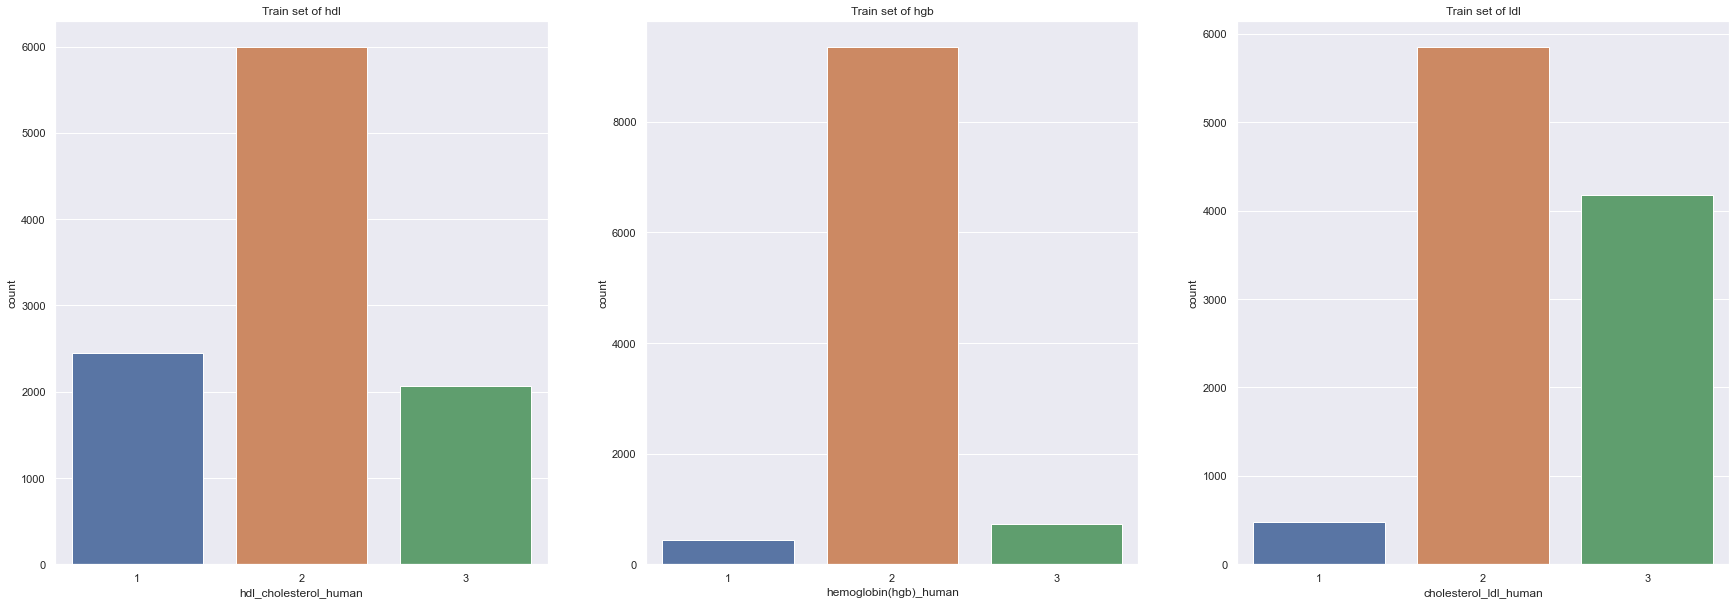

In [26]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
sns.countplot(y_train_hdl, ax=ax[0]).set_title('Train set of hdl')
sns.countplot(y_train_hgb, ax=ax[1]).set_title('Train set of hgb')
sns.countplot(y_train_ldl, ax=ax[2]).set_title('Train set of ldl')
fig.show()

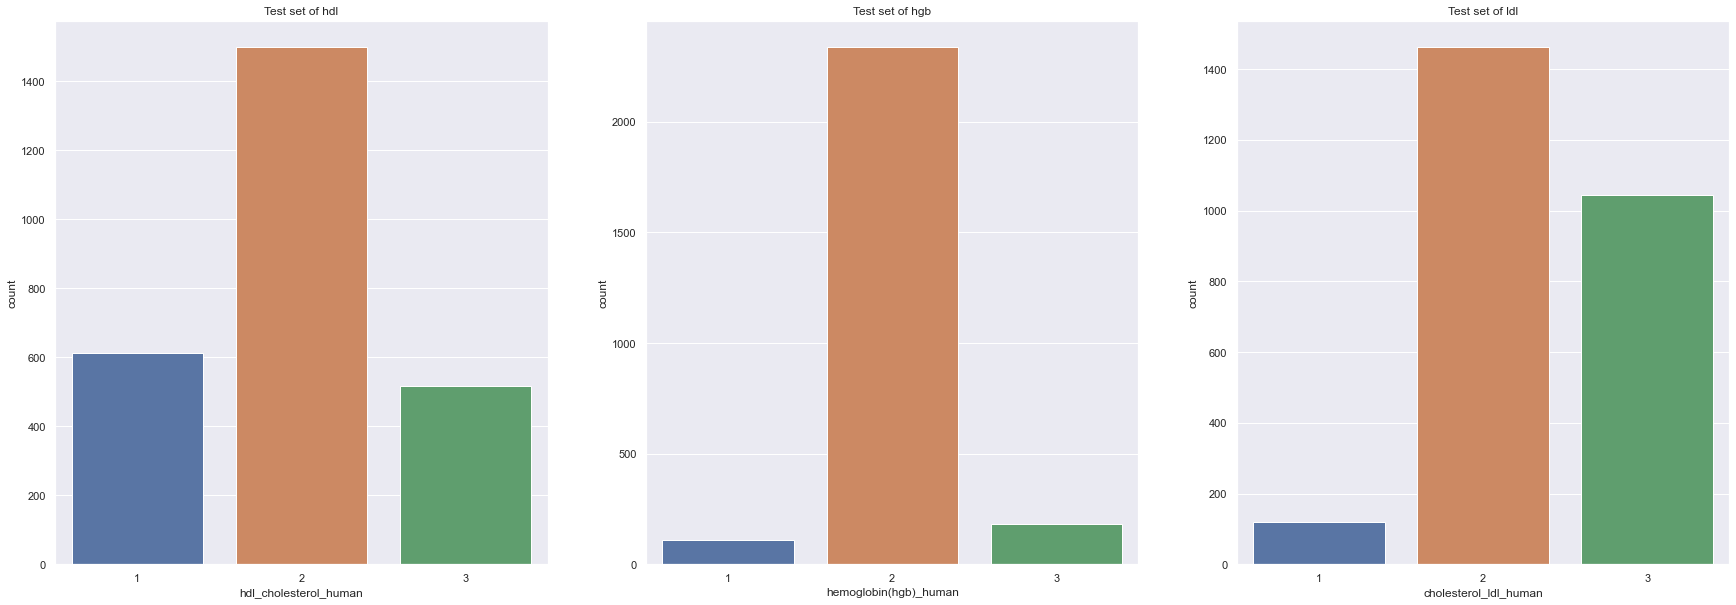

In [27]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
sns.countplot(y_test_hdl, ax=ax[0]).set_title('Test set of hdl')
sns.countplot(y_test_hgb, ax=ax[1]).set_title('Test set of hgb')
sns.countplot(y_test_ldl, ax=ax[2]).set_title('Test set of ldl')
fig.show()

We can see that the response variables were stratified well.

### PCA

For PCA we are going to
1. Scale the features using StandardScaler
2. Run PCA
3. Choose the number of components by looking at the cumulative explained variance ratio

[reference](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)  
[reference2](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)  
[reference3](https://stats.stackexchange.com/questions/198004/do-i-add-my-dependent-variable-to-pca/198009)

Text(0, 0.5, 'cumulative explained variance')

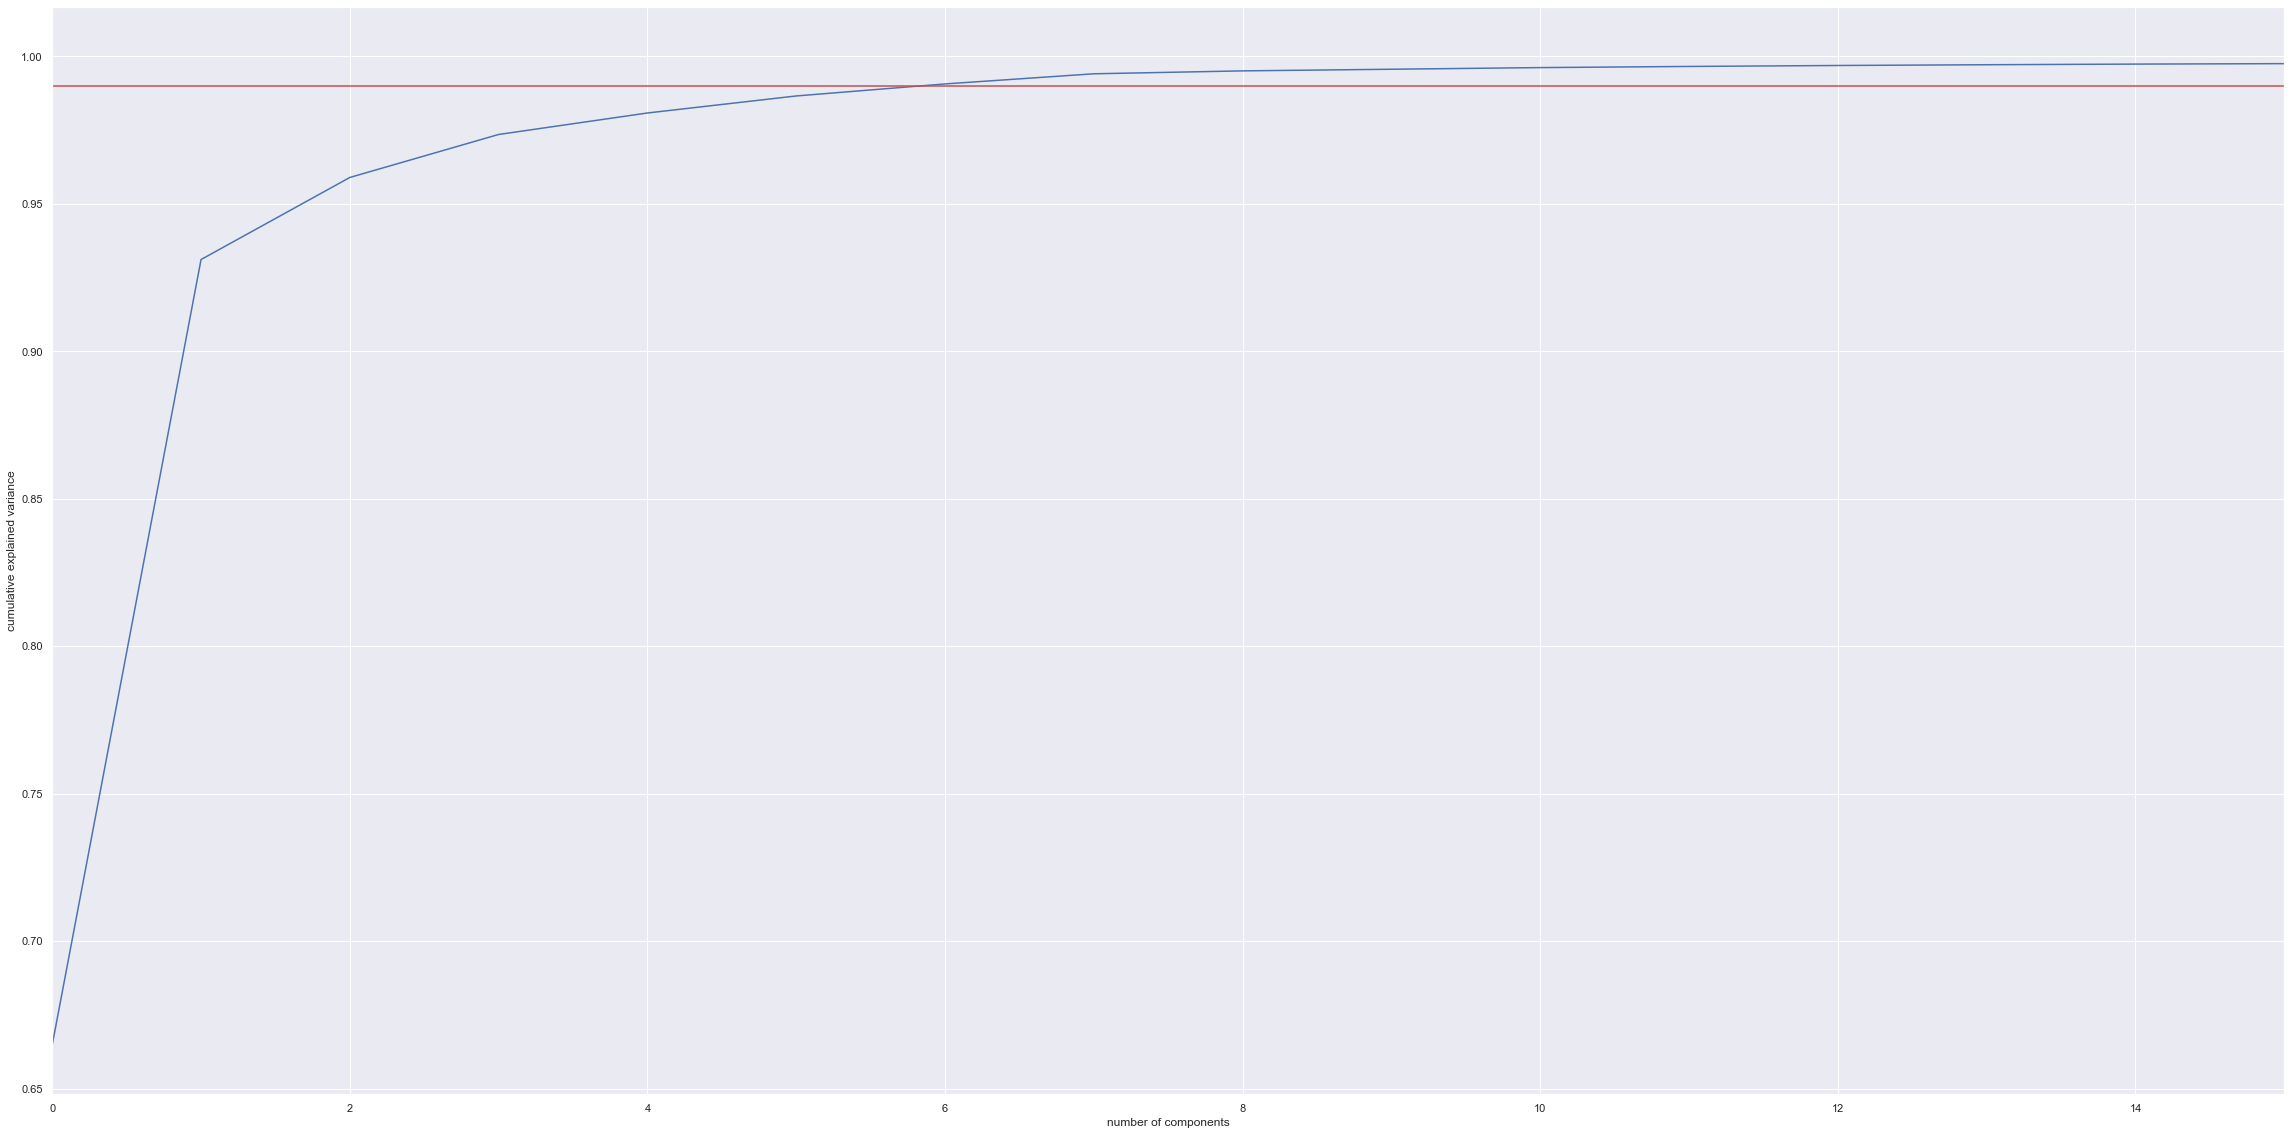

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

steps = [('scaler', StandardScaler()), ('pca', PCA())]
pipeline = Pipeline(steps)

pipeline.fit(train)
plt.figure(figsize=(40, 20))
plt.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_))
plt.axhline(y=0.99, color='r', linestyle='-')
plt.xlim(0,15)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Looks like a good cut-off point could be 6, possibly 7 and 8 as well. We can try them using GridsearchCV.

### Training - RandomForestClassifier

For training, we are going to:
1. Scale the features using StandardScaler
2. Reduce demensions by PCA
3. Train using RandomForestClassifier
Where 2,3 are carried out by 5-fold GridSearchCV

[Reference for Hyperparameter tuning](https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('pca', PCA()), ('rfc', RandomForestClassifier(random_state=0))]
pipeline = Pipeline(steps)

param_grid = {'pca__n_components': [6, 7, 8, None],
              'rfc__min_samples_leaf': [1, 2, 3]}


grid_hdl = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
grid_hgb = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
grid_ldl = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
grid_list = [grid_hdl, grid_hgb, grid_ldl]

for i in range(3):
    grid_list[i].fit(X_train_list[i], y_train_list[i])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [30]:
names = ['hdl', 'hgb', 'ldl']

for i in range(3):
    print("Best parameters ({}):".format(names[i]), grid_list[i].best_params_)
    print("CV best score ({}):".format(names[i]), grid_list[i].best_score_,"\n")

Best parameters (hdl): {'pca__n_components': 8, 'rfc__min_samples_leaf': 1}
CV best score (hdl): 0.9979052386467793 

Best parameters (hgb): {'pca__n_components': 8, 'rfc__min_samples_leaf': 1}
CV best score (hgb): 0.9956744290428217 

Best parameters (ldl): {'pca__n_components': 8, 'rfc__min_samples_leaf': 1}
CV best score (ldl): 0.9983797495384208 



In [31]:
scores = pd.DataFrame(grid_list[0].cv_results_).sort_values('rank_test_score')
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_rfc__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.102468,0.014481,0.034092,0.001152,8,1,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.997622,1.000000,0.996668,0.999524,0.995713,0.997905,0.001639,1
7,1.096091,0.021320,0.032496,0.000804,8,2,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.996194,0.998098,0.996669,0.999524,0.996190,0.997335,0.001299,2
8,1.083120,0.015382,0.033282,0.001017,8,3,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.996669,0.997622,0.996192,0.997621,0.994282,0.996477,0.001230,3
3,1.068168,0.017967,0.033885,0.000631,7,1,"{'pca__n_components': 7, 'rfc__min_samples_lea...",0.996667,0.996194,0.996669,0.998096,0.994282,0.996382,0.001228,4
4,1.056597,0.026007,0.033089,0.000745,7,2,"{'pca__n_components': 7, 'rfc__min_samples_lea...",0.996670,0.997622,0.996192,0.996669,0.993804,0.996191,0.001281,5


In [32]:
scores = pd.DataFrame(grid_list[1].cv_results_).sort_values('rank_test_score')
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_rfc__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.888637,0.011920,0.028311,0.000803,8,1,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.995682,0.992761,0.995680,0.997608,0.996641,0.995674,0.001623,1
3,0.869897,0.006845,0.028301,0.001496,7,1,"{'pca__n_components': 7, 'rfc__min_samples_lea...",0.996166,0.992281,0.994223,0.996641,0.996164,0.995095,0.001635,2
7,0.882065,0.016485,0.027497,0.000798,8,2,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.993250,0.991288,0.994709,0.996155,0.996641,0.994409,0.001960,3
8,0.876065,0.013382,0.027917,0.001095,8,3,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.993738,0.989306,0.993240,0.995668,0.994708,0.993332,0.002178,4
0,0.838962,0.009527,0.029111,0.001160,6,1,"{'pca__n_components': 6, 'rfc__min_samples_lea...",0.992757,0.989321,0.991283,0.996641,0.995189,0.993038,0.002630,5


In [33]:
scores = pd.DataFrame(grid_list[2].cv_results_).sort_values('rank_test_score')
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_rfc__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.110857,0.004059,0.033084,0.000399,8,1,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.998097,0.998097,0.997136,0.999044,0.999524,0.998380,0.000831,1
7,1.103079,0.010590,0.032484,0.000796,8,2,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.997622,0.998094,0.998087,0.998572,0.999044,0.998284,0.000485,2
8,1.098877,0.012372,0.033494,0.000803,8,3,"{'pca__n_components': 8, 'rfc__min_samples_lea...",0.998097,0.997146,0.996184,0.999044,0.998569,0.997808,0.001026,3
3,1.074936,0.012750,0.033109,0.001162,7,1,"{'pca__n_components': 7, 'rfc__min_samples_lea...",0.997148,0.997619,0.997136,0.996194,0.999524,0.997524,0.001102,4
4,1.075536,0.009318,0.032706,0.000734,7,2,"{'pca__n_components': 7, 'rfc__min_samples_lea...",0.994772,0.995242,0.997611,0.997142,0.998573,0.996668,0.001440,5


### PCA Feature Importances

[reference](https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis)

"Each feature influences each PC in different way. This means that you can only draw coclusions like the following: feature 1, 3 and 4 are the most important/have the highest influence on PC1 and feature 2 is the most important/has the highest influence on PC2 etc for N components."

#### hdl

In [131]:
n = len(grid_list[0].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(grid_list[0].best_estimator_.named_steps['pca'].components_[i])))

    
PC_hdl = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
PC_hdl['PC'] = pc_list
PC_hdl['Explained Variance Ratio'] = grid_list[0].best_estimator_.named_steps['pca'].explained_variance_ratio_
PC_hdl['Most Important feature'] = feature_list

PC_hdl

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664061,absorbance90
1,PC2,0.266719,absorbance117
2,PC3,0.028118,absorbance169
3,PC4,0.014584,absorbance168
4,PC5,0.007260,humidity
5,PC6,0.005810,temperature
6,PC7,0.004058,humidity
7,PC8,0.003474,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third

#### hgb

In [132]:
n = len(grid_list[1].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(grid_list[1].best_estimator_.named_steps['pca'].components_[i])))

    
PC_hgb = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
PC_hgb['PC'] = pc_list
PC_hgb['Explained Variance Ratio'] = grid_list[1].best_estimator_.named_steps['pca'].explained_variance_ratio_
PC_hgb['Most Important feature'] = feature_list

PC_hgb

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664898,absorbance90
1,PC2,0.266093,absorbance115
2,PC3,0.027888,absorbance169
3,PC4,0.014637,absorbance168
4,PC5,0.007255,humidity
5,PC6,0.005806,temperature
6,PC7,0.004066,humidity
7,PC8,0.003450,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third. The only difference from hdl was PC2's feature.

#### ldl

In [133]:
n = len(grid_list[2].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(grid_list[2].best_estimator_.named_steps['pca'].components_[i])))

    
PC_ldl = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
PC_ldl['PC'] = pc_list
PC_ldl['Explained Variance Ratio'] = grid_list[2].best_estimator_.named_steps['pca'].explained_variance_ratio_
PC_ldl['Most Important feature'] = feature_list

PC_ldl

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664325,absorbance90
1,PC2,0.267008,absorbance115
2,PC3,0.027740,absorbance169
3,PC4,0.014523,absorbance168
4,PC5,0.007279,humidity
5,PC6,0.005737,temperature
6,PC7,0.004083,humidity
7,PC8,0.003460,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third. Pretty much the same as hgb.

### Validation

In [43]:
from sklearn.metrics import f1_score

val = []

for i in range(3):
    val.append(grid_list[i].predict(X_test_list[i]))
    print("f1_score_weighted ({}):".format(names[i]), f1_score(y_test_list[i], val[i], average='weighted'),"\n")  # for imbalanced data

f1_score_weighted (hdl): 0.9988588097087497 

f1_score_weighted (hgb): 0.9950029888672359 

f1_score_weighted (ldl): 1.0 



### Prediction

In [44]:
pred_hdl = grid_list[0].best_estimator_.predict(test)
pred_hgb = grid_list[1].best_estimator_.predict(test)
pred_ldl = grid_list[2].best_estimator_.predict(test)

In [45]:
pred = pd.DataFrame()

pred["Reading_ID"] = test_id
pred["hdl_cholesterol_human"] = pred_hdl
pred["hemoglobin(hgb)_human"] = pred_hgb
pred["cholesterol_ldl_human"] = pred_ldl

In [46]:
pred

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,2,2,3
1,ID_4W85V5DV,2,2,2
2,ID_L4YR3NDY,2,2,2
3,ID_U88E3SQ6,2,2,2
4,ID_NW7Z3XU7,2,2,2
...,...,...,...,...
3655,ID_ADCBL266,2,2,2
3656,ID_SW51B61O,2,2,2
3657,ID_CO8IHJRA,2,2,2
3658,ID_VN5CP3ZZ,2,2,2


We need to transform our predictions from 1, 2, 3 to low, ok, high respectively

In [47]:
def transform(value):
    if value == 1:
        return 'low'
    elif value == 2:
        return 'ok'
    else:
        return 'high'

In [48]:
pred["hdl_cholesterol_human"] = pred["hdl_cholesterol_human"].apply(lambda x: transform(x))
pred["hemoglobin(hgb)_human"] = pred["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
pred["cholesterol_ldl_human"] = pred["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [49]:
pred

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,ok,ok,high
1,ID_4W85V5DV,ok,ok,ok
2,ID_L4YR3NDY,ok,ok,ok
3,ID_U88E3SQ6,ok,ok,ok
4,ID_NW7Z3XU7,ok,ok,ok
...,...,...,...,...
3655,ID_ADCBL266,ok,ok,ok
3656,ID_SW51B61O,ok,ok,ok
3657,ID_CO8IHJRA,ok,ok,ok
3658,ID_VN5CP3ZZ,ok,ok,ok


## Submission

We need to convert our submission as per the sample submission 

In [50]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [51]:
hdl_rows = pd.DataFrame(pred.apply(transform_c_hdl, axis=1))

In [52]:
def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [53]:
hemo_rows = pd.DataFrame(pred.apply(transform_hemo, axis=1))

In [54]:
def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

In [55]:
ldl_rows = pd.DataFrame(pred.apply(transform_c_ldl, axis=1))

In [56]:
pred = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [57]:
pred["target"] = pred[0].apply(lambda x: x.split("-")[1])
pred[0] = pred[0].apply(lambda x: x.split("-")[0])

In [58]:
pred = pred.rename(columns={0:"Reading_ID"})

In [59]:
pred

,Reading_ID,target
0,ID_37BEI22R_hdl_cholesterol_human,ok
1,ID_4W85V5DV_hdl_cholesterol_human,ok
2,ID_L4YR3NDY_hdl_cholesterol_human,ok
3,ID_U88E3SQ6_hdl_cholesterol_human,ok
4,ID_NW7Z3XU7_hdl_cholesterol_human,ok
...,...,...
10975,ID_ADCBL266_cholesterol_ldl_human,ok
10976,ID_SW51B61O_cholesterol_ldl_human,ok
10977,ID_CO8IHJRA_cholesterol_ldl_human,ok
10978,ID_VN5CP3ZZ_cholesterol_ldl_human,ok


In [139]:
pred.to_csv("pca_rf_cv5_final.csv", index=False)

### Training - XGBClassifier

Same as above

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('pca', PCA()), ('xgbc', XGBClassifier(eval_metric='mlogloss', tree_method='gpu_hist'))]
pipeline = Pipeline(steps)

param_grid = {'pca__n_components': [6, 7, 8, None],
              'xgbc__learning_rate': [0.1, 0.5, 1]}


xgb_grid_hdl = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
xgb_grid_hgb = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
xgb_grid_ldl = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, scoring='f1_weighted')
xgb_grid_list = [xgb_grid_hdl, xgb_grid_hgb, xgb_grid_ldl]

for i in range(3):
    xgb_grid_list[i].fit(X_train_list[i], y_train_list[i])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [62]:
names = ['hdl', 'hgb', 'ldl']

for i in range(3):
    print("Best parameters ({}):".format(names[i]), xgb_grid_list[i].best_params_)
    print("CV best score ({}):".format(names[i]), xgb_grid_list[i].best_score_,"\n")

Best parameters (hdl): {'pca__n_components': 8, 'xgbc__learning_rate': 1}
CV best score (hdl): 0.99704965102648 

Best parameters (hgb): {'pca__n_components': 8, 'xgbc__learning_rate': 0.5}
CV best score (hgb): 0.997030885397699 

Best parameters (ldl): {'pca__n_components': 8, 'xgbc__learning_rate': 0.5}
CV best score (ldl): 0.9977163707424301 



In [63]:
xgb_scores = pd.DataFrame(xgb_grid_list[0].cv_results_).sort_values('rank_test_score')
xgb_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_xgbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.714290,0.015196,0.009774,7.461747e-04,8,1,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.996670,0.997145,0.997145,0.998096,0.996192,0.997050,0.000631,1
7,0.919541,0.008272,0.010571,7.982137e-04,8,0.5,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.997621,0.996197,0.998096,0.997144,0.995717,0.996955,0.000882,2
10,2.188348,0.016453,0.013165,7.463529e-04,None,0.5,"{'pca__n_components': None, 'xgbc__learning_ra...",0.996194,0.996195,0.997144,0.995715,0.995715,0.996193,0.000522,3
4,0.954448,0.010797,0.010372,4.885582e-04,7,0.5,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.995241,0.994770,0.996668,0.997620,0.996192,0.996098,0.001015,4
5,0.721471,0.018310,0.009973,7.921814e-07,7,1,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.995718,0.993815,0.995716,0.998572,0.995717,0.995908,0.001522,5


In [64]:
xgb_scores = pd.DataFrame(xgb_grid_list[1].cv_results_).sort_values('rank_test_score')
xgb_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_xgbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.678785,0.012998,0.009375,0.000489,8,0.5,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.997127,0.996648,0.996155,0.998089,0.997135,0.997031,0.000641,1
4,0.682375,0.003806,0.009774,0.000399,7,0.5,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.994710,0.994239,0.996155,0.998569,0.998566,0.996448,0.001842,2
5,0.541552,0.012182,0.009774,0.000399,7,1,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.994723,0.994236,0.996143,0.998089,0.997125,0.996063,0.001440,3
8,0.540156,0.014113,0.009175,0.000399,8,1,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.995679,0.994712,0.995664,0.998089,0.995688,0.995966,0.001125,4
1,0.693146,0.026296,0.009574,0.000489,6,0.5,"{'pca__n_components': 6, 'xgbc__learning_rate'...",0.995692,0.993266,0.993247,0.998089,0.998089,0.995677,0.002161,5


In [65]:
xgb_scores = pd.DataFrame(xgb_grid_list[2].cv_results_).sort_values('rank_test_score')
xgb_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_xgbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.890020,0.008799,0.009973,0.000631,8,0.5,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.997622,0.996671,0.997145,0.998572,0.998572,0.997716,0.000761,1
8,0.685168,0.023702,0.009375,0.000489,8,1,"{'pca__n_components': 8, 'xgbc__learning_rate'...",0.998098,0.995242,0.996669,0.998092,0.997621,0.997144,0.001085,2
4,0.911762,0.004695,0.010173,0.000399,7,0.5,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.995715,0.994766,0.997142,0.997147,0.998577,0.996669,0.001313,3
5,0.707308,0.010159,0.009774,0.000399,7,1,"{'pca__n_components': 7, 'xgbc__learning_rate'...",0.993333,0.993817,0.994280,0.996671,0.998098,0.995240,0.001833,4
10,2.097192,0.022676,0.012566,0.000489,None,0.5,"{'pca__n_components': None, 'xgbc__learning_ra...",0.994753,0.993340,0.996666,0.994759,0.994759,0.994855,0.001059,5


### PCA Feature Importances

#### hdl

In [134]:
n = len(xgb_grid_list[0].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(xgb_grid_list[0].best_estimator_.named_steps['pca'].components_[i])))

    
xgb_PC_hdl = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
xgb_PC_hdl['PC'] = pc_list
xgb_PC_hdl['Explained Variance Ratio'] = xgb_grid_list[0].best_estimator_.named_steps['pca'].explained_variance_ratio_
xgb_PC_hdl['Most Important feature'] = feature_list

xgb_PC_hdl

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664061,absorbance90
1,PC2,0.266719,absorbance117
2,PC3,0.028118,absorbance169
3,PC4,0.014584,absorbance168
4,PC5,0.007260,humidity
5,PC6,0.005810,temperature
6,PC7,0.004058,humidity
7,PC8,0.003474,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third

#### hgb

In [135]:
n = len(xgb_grid_list[1].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(xgb_grid_list[1].best_estimator_.named_steps['pca'].components_[i])))

    
xgb_PC_hgb = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
xgb_PC_hgb['PC'] = pc_list
xgb_PC_hgb['Explained Variance Ratio'] = xgb_grid_list[1].best_estimator_.named_steps['pca'].explained_variance_ratio_
xgb_PC_hgb['Most Important feature'] = feature_list

xgb_PC_hgb

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664898,absorbance90
1,PC2,0.266093,absorbance115
2,PC3,0.027888,absorbance169
3,PC4,0.014637,absorbance168
4,PC5,0.007255,humidity
5,PC6,0.005806,temperature
6,PC7,0.004066,humidity
7,PC8,0.003450,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third. The only difference from hdl was PC2's feature.

#### ldl

In [136]:
n = len(xgb_grid_list[2].best_estimator_.named_steps['pca'].explained_variance_ratio_)  # Total number of principal components

indice_list = []  # The indices of the  most important features for each PC

for i in range(n):
    indice_list.append(np.argmax(abs(xgb_grid_list[2].best_estimator_.named_steps['pca'].components_[i])))

    
xgb_PC_ldl = pd.DataFrame()  # To make a dataframe containing, each PC's explained variance ratio and its most important feature
pc_list = []
feature_list = []

for i in range(n):
    pc_list.append('PC{}'.format(i+1))
    feature_list.append(train.columns[indice_list[i]])
    
xgb_PC_ldl['PC'] = pc_list
xgb_PC_ldl['Explained Variance Ratio'] = xgb_grid_list[2].best_estimator_.named_steps['pca'].explained_variance_ratio_
xgb_PC_ldl['Most Important feature'] = feature_list

xgb_PC_ldl

,PC,Explained Variance Ratio,Most Important feature
0,PC1,0.664325,absorbance90
1,PC2,0.267008,absorbance115
2,PC3,0.027740,absorbance169
3,PC4,0.014523,absorbance168
4,PC5,0.007279,humidity
5,PC6,0.005737,temperature
6,PC7,0.004083,humidity
7,PC8,0.003460,absorbance97


The first principal component explains roughly 66% of the variance, 27% for the second, and 3% for the third. Pretty much the same as hgb.

The results were pretty much the same as RandomForest's

### Validation

In [76]:
from sklearn.metrics import f1_score

xgb_val = []

for i in range(3):
    xgb_val.append(xgb_grid_list[i].predict(X_test_list[i]))
    print("f1_score_weighted ({}):".format(names[i]), f1_score(y_test_list[i], xgb_val[i], average='weighted'),"\n")  # for imbalanced data

f1_score_weighted (hdl): 0.9984787236538748 

f1_score_weighted (hgb): 0.9965475356239767 

f1_score_weighted (ldl): 0.997710723008925 



### Prediction

In [77]:
xgb_pred_hdl = xgb_grid_list[0].best_estimator_.predict(test)
xgb_pred_hgb = xgb_grid_list[1].best_estimator_.predict(test)
xgb_pred_ldl = xgb_grid_list[2].best_estimator_.predict(test)

In [78]:
xgb_pred = pd.DataFrame()

xgb_pred["Reading_ID"] = test_id
xgb_pred["hdl_cholesterol_human"] = xgb_pred_hdl
xgb_pred["hemoglobin(hgb)_human"] = xgb_pred_hgb
xgb_pred["cholesterol_ldl_human"] = xgb_pred_ldl

In [79]:
xgb_pred

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,2,2,3
1,ID_4W85V5DV,2,2,3
2,ID_L4YR3NDY,2,2,2
3,ID_U88E3SQ6,2,2,2
4,ID_NW7Z3XU7,2,2,2
...,...,...,...,...
3655,ID_ADCBL266,3,2,2
3656,ID_SW51B61O,1,2,3
3657,ID_CO8IHJRA,2,2,2
3658,ID_VN5CP3ZZ,2,2,2


We need to transform our predictions from 1, 2, 3 to low, ok, high respectively

In [80]:
def transform(value):
    if value == 1:
        return 'low'
    elif value == 2:
        return 'ok'
    else:
        return 'high'

In [81]:
xgb_pred["hdl_cholesterol_human"] = xgb_pred["hdl_cholesterol_human"].apply(lambda x: transform(x))
xgb_pred["hemoglobin(hgb)_human"] = xgb_pred["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
xgb_pred["cholesterol_ldl_human"] = xgb_pred["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [82]:
xgb_pred

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,ok,ok,high
1,ID_4W85V5DV,ok,ok,high
2,ID_L4YR3NDY,ok,ok,ok
3,ID_U88E3SQ6,ok,ok,ok
4,ID_NW7Z3XU7,ok,ok,ok
...,...,...,...,...
3655,ID_ADCBL266,high,ok,ok
3656,ID_SW51B61O,low,ok,high
3657,ID_CO8IHJRA,ok,ok,ok
3658,ID_VN5CP3ZZ,ok,ok,ok


## Submission

We need to convert our submission as per the sample submission 

In [83]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [84]:
hdl_rows = pd.DataFrame(xgb_pred.apply(transform_c_hdl, axis=1))

In [85]:
def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [86]:
hemo_rows = pd.DataFrame(xgb_pred.apply(transform_hemo, axis=1))

In [87]:
def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

In [88]:
ldl_rows = pd.DataFrame(xgb_pred.apply(transform_c_ldl, axis=1))

In [89]:
xgb_pred = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [90]:
xgb_pred["target"] = xgb_pred[0].apply(lambda x: x.split("-")[1])
xgb_pred[0] = xgb_pred[0].apply(lambda x: x.split("-")[0])

In [91]:
xgb_pred = xgb_pred.rename(columns={0:"Reading_ID"})

In [92]:
xgb_pred

,Reading_ID,target
0,ID_37BEI22R_hdl_cholesterol_human,ok
1,ID_4W85V5DV_hdl_cholesterol_human,ok
2,ID_L4YR3NDY_hdl_cholesterol_human,ok
3,ID_U88E3SQ6_hdl_cholesterol_human,ok
4,ID_NW7Z3XU7_hdl_cholesterol_human,ok
...,...,...
10975,ID_ADCBL266_cholesterol_ldl_human,ok
10976,ID_SW51B61O_cholesterol_ldl_human,high
10977,ID_CO8IHJRA_cholesterol_ldl_human,ok
10978,ID_VN5CP3ZZ_cholesterol_ldl_human,ok


In [137]:
xgb_pred.to_csv("pca_xgb_cv5_final.csv", index=False)

In [138]:
# Save Session
import dill
dill.dump_session('pca_rf_xgb_cv5_final.db')

'''
# Load Session
import dill
dill.load_session('pca_rf_xgb_cv5_final.db')
'''

"\n# Load Session\nimport dill\ndill.load_session('pca_rf_xgb_cv5_final.db')\n"

## Reference

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
https://xgboost.readthedocs.io/en/stable/parameter.html